In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import math
from clean_text import clean 
import re
from nltk import word_tokenize


In [2]:
tf_idf_df = pd.read_csv('results/tf_idf_evaluation.csv')
tr_df = pd.read_csv('results/textRank_evaluation.csv')

In [114]:
tf_idf.fillna(math.nan)


,Post,threads,depth,ngsl_labels,tsl_labels,nawl_labels,awl_labels,nacl_labels,clean_thread,tf_idf_scores,keyphrases,ngsl_recall,ngsl_accuracy,tsl_recall,tsl_accuracy,awl_recall,awl_accuracy,nawl_recall,nawl_accuracy
0,"Alex Epstein, the author of The Moral Case for...",Kudos to all the commenters who came before me...,51,"['dead', 'stone', 'source', 'coal', 'change', ...","['thirsty', 'harmful', 'solar', 'mislead', 'wi...","['usage', 'banging', 'impact', 'conserving', '...","['definitely', 'consistent', 'establishment', ...",NaN,kudos to all the commenters who came before me...,"{'energy': {'score': 105.59857529301743}, 'oil...","['energy', 'oil', 'solar', 'fossil', 'nuclear'...",16.30,16.30,10.0,10.0,14.55,14.55,30.0,30.0
1,A “dangerous admixture of propulsive ambition ...,Does Jared have a degreed sister who can write...,18,"['light', 'die', 'nothing', 'right', 'jail', '...","['withdrawal', 'media', 'distract']","['media', 'bundle']","['option', 'strategies', 'media', 'via', 'inve...",NaN,does jared have a degreed sister who can write...,"{'sociopath': {'score': 21.043589460116934}, '...","['sociopath', 'another sociopath', 'addison', ...",9.80,9.80,0.0,0.0,11.11,11.11,0.0,0.0
2,The director of the CDC is warning of the dual...,We are screwed. Could. people like this are th...,3,"['could', 'people', 'universal', 'like', 'heal...",['healthcare'],['candidates'],[],NaN,we are screwed could people like this are the ...,"{'fall': {'score': 11.256470917838175}, 'fall ...","['fall', 'fall could', 'worst ever']",30.00,30.00,0.0,0.0,NaN,NaN,0.0,0.0
3,NaN,"Damnnnnn. So, when you are a lawyer, and you h...",2,"['easy', 'good', 'decision', 'defend', 'get', ...",['client'],['client'],['policy'],NaN,damnnnnn so when you are a lawyer and you have...,"{'lawyer': {'score': 12.642765278958066}, 'pol...","['lawyer', 'policy', 'damnnnnn lawyer']",11.11,11.11,0.0,0.0,100.00,100.00,0.0,0.0
4,NaN,"🤣🤣🤣. Seattle is not even worth it anymore, the...",6,"['figure', 'strike', 'come', 'police', 'matter...",['quit'],[],[],NaN,seattle is not even worth it anymore they bro...,"{'seattle': {'score': 14.932943678333814}, 'ch...","['seattle', 'chief best', 'spd', 'salary', 'ch...",5.00,5.00,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,Imagine being such a simp you put yourself in ...,I always thought it was more to discourage guy...,2,"['since', 'save', 'people', 'way', 'literally'...",[],[],[],NaN,i always thought it was more to discourage guy...,"{'back old': {'score': 7.014529820038978}, 'li...","['back old', 'literally threw', 'well people']",30.77,30.77,NaN,NaN,NaN,NaN,NaN,NaN
1223,Imagine being such a simp you put yourself in ...,I always thought it was more to discourage guy...,2,"['since', 'save', 'people', 'way', 'literally'...",[],[],[],NaN,i always thought it was more to discourage guy...,"{'back old': {'score': 7.014529820038978}, 'li...","['back old', 'literally threw', 'well people']",30.77,30.77,NaN,NaN,NaN,NaN,NaN,NaN
1224,Females are strong as hell: Critiquing the Sel...,Lmk if u can drive me bc if not I’ll j ask big...,3,"['cultural', 'big', 'drive', 'ask', 'critical']",[],[],['cultural'],NaN,lmk if u can drive me bc if not i will j ask b...,"{'spaces new': {'score': 7.419994928147142}, '...","['spaces new', 'new media']",0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN
1225,NEW: We just released a report examining fatal...,"No matter how you look at this, the data is sa...",2,"['problem', 'damage', 'till', 'loss', 'sad', '...",['invention'],[],"['ignored', 'data', 'issues']",NaN,no matter how you look at this the data is sad...,"{'data': {'score': 10.337406259081295}, 'ones ...","['data', 'ones collateral', 'resulted horrible...",26.67,26.67,0.0,0.0,33.33,33.33,NaN,NaN


In [115]:
tr_df.fillna(math.nan)

,Post,threads,depth,ngsl_labels,tsl_labels,nawl_labels,awl_labels,nacl_labels,text_rank_outputs,ngsl_recall,ngsl_accuracy,tsl_recall,tsl_accuracy,awl_recall,awl_accuracy,nawl_recall,nawl_accuracy
0,"Alex Epstein, the author of The Moral Case for...",Kudos to all the commenters who came before me...,51,"['dead', 'stone', 'source', 'coal', 'change', ...","['thirsty', 'harmful', 'solar', 'mislead', 'wi...","['usage', 'banging', 'impact', 'conserving', '...","['definitely', 'consistent', 'establishment', ...",NaN,"['energy', 'oil', 'propaganda', 'many', 'nucle...",22.10,22.10,30.0,30.0,29.09,29.09,40.0,40.0
1,A “dangerous admixture of propulsive ambition ...,Does Jared have a degreed sister who can write...,18,"['light', 'die', 'nothing', 'right', 'jail', '...","['withdrawal', 'media', 'distract']","['media', 'bundle']","['option', 'strategies', 'media', 'via', 'inve...",NaN,"['easy', 'wh', 'trading', 'psycho', 'james', '...",9.80,9.80,0.0,0.0,0.00,0.00,0.0,0.0
2,The director of the CDC is warning of the dual...,We are screwed. Could. people like this are th...,3,"['could', 'people', 'universal', 'like', 'heal...",['healthcare'],['candidates'],[],NaN,"['fall', 'people', 'reason']",30.00,30.00,0.0,0.0,NaN,NaN,0.0,0.0
3,NaN,"Damnnnnn. So, when you are a lawyer, and you h...",2,"['easy', 'good', 'decision', 'defend', 'get', ...",['client'],['client'],['policy'],NaN,"['damnnnnn', 'lawyer', 'clients']",0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0
4,NaN,"🤣🤣🤣. Seattle is not even worth it anymore, the...",6,"['figure', 'strike', 'come', 'police', 'matter...",['quit'],[],[],NaN,"['seattle', 'wait', 'cut', 'jennifer', 'police...",20.00,20.00,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,Imagine being such a simp you put yourself in ...,I always thought it was more to discourage guy...,2,"['since', 'save', 'people', 'way', 'literally'...",[],[],[],NaN,"['guys', 'girls', 'life']",7.69,7.69,NaN,NaN,NaN,NaN,NaN,NaN
1223,Imagine being such a simp you put yourself in ...,I always thought it was more to discourage guy...,2,"['since', 'save', 'people', 'way', 'literally'...",[],[],[],NaN,"['guys', 'girls', 'life']",7.69,7.69,NaN,NaN,NaN,NaN,NaN,NaN
1224,Females are strong as hell: Critiquing the Sel...,Lmk if u can drive me bc if not I’ll j ask big...,3,"['cultural', 'big', 'drive', 'ask', 'critical']",[],[],['cultural'],NaN,"['new', 'lens']",0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN
1225,NEW: We just released a report examining fatal...,"No matter how you look at this, the data is sa...",2,"['problem', 'damage', 'till', 'loss', 'sad', '...",['invention'],[],"['ignored', 'data', 'issues']",NaN,"['data', 'loss', 'problems', 'family']",13.33,13.33,0.0,0.0,33.33,33.33,NaN,NaN


In [116]:
tf_idf_nawl = tf_idf.dropna(subset=['nawl_recall'])
tf_idf_awl = tf_idf.dropna(subset=['awl_recall'])
tf_idf_tsl = tf_idf.dropna(subset=['tsl_recall'])
tf_idf_ngsl = tf_idf.dropna(subset=['ngsl_recall'])

tr_nawl = tr_df.dropna(subset=['nawl_recall'])
tr_awl = tr_df.dropna(subset=['awl_recall'])
tr_tsl = tr_df.dropna(subset=['tsl_recall'])
tr_ngsl = tf_idf.dropna(subset=['ngsl_recall'])




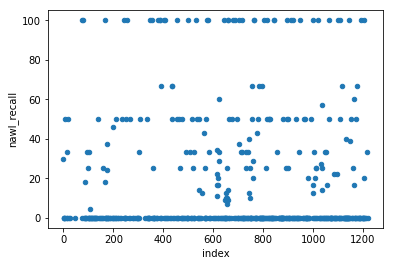

In [117]:
tf_idf_nawl.reset_index().plot.scatter(x = 'index', y = 'nawl_recall')

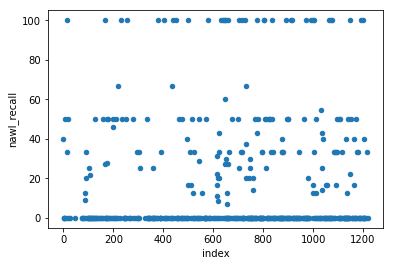

In [118]:
tr_nawl.reset_index().plot.scatter(x='index', y='nawl_recall')

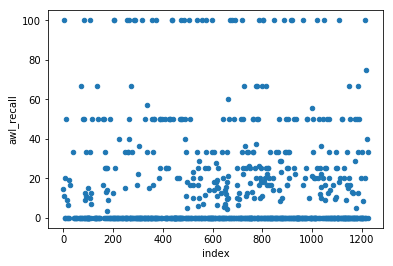

In [119]:
tf_idf_awl.reset_index().plot.scatter(x = 'index', y = 'awl_recall')

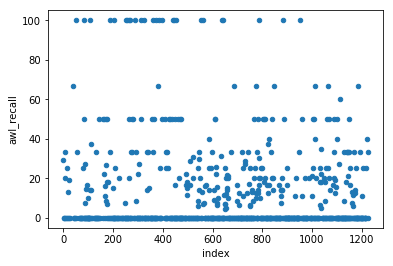

In [120]:
tr_awl.reset_index().plot.scatter(x = 'index', y = 'awl_recall')

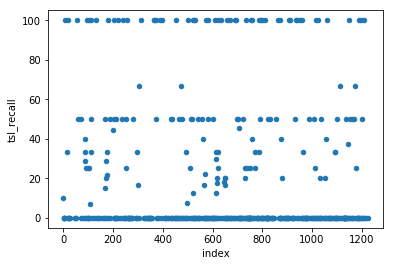

In [121]:
tf_idf_tsl.reset_index().plot.scatter(x = 'index', y = 'tsl_recall')

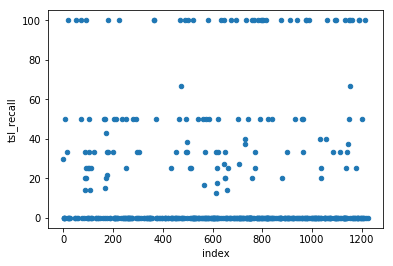

In [122]:
tr_tsl.reset_index().plot.scatter(x='index', y='tsl_recall')

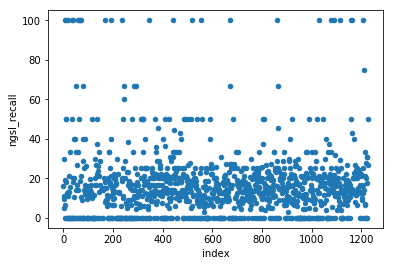

In [123]:
tf_idf_ngsl.reset_index().plot.scatter(x='index', y='ngsl_recall')

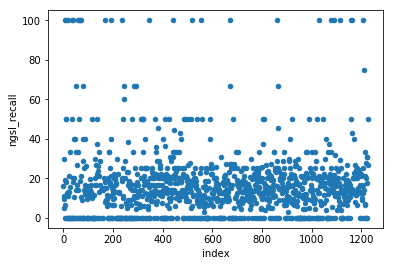

In [124]:
tr_ngsl.reset_index().plot.scatter(x='index', y='ngsl_recall')